<a href="https://colab.research.google.com/github/hits-sdo/hits-sdo-similaritysearch/blob/dj_patch_inference/search_byol/byol_train_pl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook to Intialize HITS-SDO self-similarity search environment
- Run all cells to initalize environment, and restart runtime if prompted to use updated versions. You will need to rerun the cells again to ensure that all dependencies have been installed.

# Download and Unzip Data

In [1]:
# Download Data - Uncomment the one you want

# 171 with false yellow colors - https://drive.google.com/file/d/15C5spf1la7L09kvWXll2qt67Ec0rwLsY/view?usp=drive_link
# !gdown 15C5spf1la7L09kvWXll2qt67Ec0rwLsY


# 171 grayscale - https://drive.google.com/file/d/16WD0td1f5gx4yIIDkWWSTb-oZcezI1CU/view?usp=drive_link
# !gdown 16WD0td1f5gx4yIIDkWWSTb-oZcezI1CU


# # Multiwavelength r:211 g:193 b:171 https://drive.google.com/file/d/1DMIatOmA4XcoWeW0oAUkZujx8YrhLkpY/view?usp=sharing
# !gdown 1DMIatOmA4XcoWeW0oAUkZujx8YrhLkpY
# # Multiwavelength r:211 g:193 b:171active cycle extension https://drive.google.com/file/d/1-BPQpdQWNwZzoVpg3lQ143cr3_UPE36M/view?usp=sharing
# !gdown 1-BPQpdQWNwZzoVpg3lQ143cr3_UPE36M

# Multiwavelength r:211 g:193 b:171 256x256 https://drive.google.com/file/d/1X8RSekrAOryVGSOeC18NOctfJCQrZCUa/view?usp=sharing
!gdown 1X8RSekrAOryVGSOeC18NOctfJCQrZCUa


# Multiwavelength r:304 g:211 b:171 https://drive.google.com/file/d/1Pts431S-fdSfJJ6pt79-fkNYazXqO9O7/view?usp=sharing
# !gdown 1Pts431S-fdSfJJ6pt79-fkNYazXqO9O7
# Multiwavelength r:304 g:211 b:171 active cycle extension https://drive.google.com/file/d/1Sbbgi6HzJkuCTUF8tJTLeddpGIjGXTcj/view?usp=sharing
# !gdown 1Sbbgi6HzJkuCTUF8tJTLeddpGIjGXTcj


# Multiwavelength r:335 g:193 b:94 https://drive.google.com/file/d/1v0IYSzwiQcHPcnSsTAeU7bI8c4310b35/view?usp=sharing
# !gdown 1v0IYSzwiQcHPcnSsTAeU7bI8c4310b35
# Multiwavelength r:335 g:193 b:94 active cycle extension https://drive.google.com/file/d/1uSt8BzpVj5GgM9SwSsDcQMEE4lv1uTJo/view?usp=sharing
# !gdown 1uSt8BzpVj5GgM9SwSsDcQMEE4lv1uTJo

# Dummy image for inference.
# https://drive.google.com/file/d/1WDjnPWo79S4B6hp0GgvOhhA1n-P9st0e/view?usp=sharing
!gdown 1WDjnPWo79S4B6hp0GgvOhhA1n-P9st0e

Downloading...
From: https://drive.google.com/uc?id=1X8RSekrAOryVGSOeC18NOctfJCQrZCUa
To: /content/AIA211_193_171_256x256.tar.gz
100% 297M/297M [00:02<00:00, 130MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WDjnPWo79S4B6hp0GgvOhhA1n-P9st0e
To: /content/AIA211_193_171_raw.zip
100% 310M/310M [00:01<00:00, 182MB/s]


In [2]:
pwd

'/content'

In [3]:
# Unzip file make them match the cell above

# 171 with false yellow colors
# !tar -zxf aia_171_color_1perMonth.tar.gz


# 171 grayscale
# !tar -zxf AIA171_Miniset_BW.tar.gz


# # Multiwavelength r:211 g:193 b:171
# !tar -zxf AIA211_193_171_Miniset.tar.gz
# # Multiwavelength r:211 g:193 b:171active cycle extension
# !tar -zxf AIA211_193_171_Miniset_ext.tar.gz

# Multiwavelength r:211 g:193 b:171 256x256
!tar -zxf AIA211_193_171_256x256.tar.gz

# Multiwavelength r:304 g:211 b:171
# !tar -zxf AIA304_211_171_Miniset.tar.gz
# Multiwavelength r:304 g:211 b:171 active cycle extension
# !tar -zxf AIA304_211_171_Miniset_ext.tar.gz


# Multiwavelength r:335 g:193 b:94
# !tar -zxf AIA335_193_94_Miniset.tar.gz
# Multiwavelength r:335 g:193 b:94 active cycle extension
# !tar -zxf AIA335_193_94_Miniset_ext.tar.gz

# Unzip dummy image for inference.
from zipfile import ZipFile
imagesfile = 'AIA211_193_171_raw.zip'
with ZipFile(imagesfile, 'r') as f:
  f.extractall()


In [4]:
ls

AIA211_193_171_256x256/        AIA211_193_171_raw/     sample_data/
AIA211_193_171_256x256.tar.gz  AIA211_193_171_raw.zip


In [6]:
pwd

'/content'

In [26]:
# Print some files to see that they exist - match cells above

# 171 with false yellow colors
# !du aia_171_color_1perMonth/. -l -h

# 171 grayscale
# !du AIA171_Miniset_BW/. -l -h

# Multiwavelength r:211 g:193 b:171
# !du AIA211_193_171_Miniset/. -l -h

# Multiwavelength r:304 g:211 b:171
# !du AIA304_211_171_Miniset/. -l -h

# Multiwavelength r:335 g:193 b:94
# !du AIA335_193_94_Miniset/. -l -h


# Clone repository

In [7]:
# Clone the repository from GitHub
!git clone https://github.com/hits-sdo/hits-sdo-similaritysearch

Cloning into 'hits-sdo-similaritysearch'...
remote: Enumerating objects: 1688, done.
remote: Counting objects: 100% (404/404), done.
remote: Compressing objects: 100% (187/187), done.
remote: Total 1688 (delta 254), reused 282 (delta 215), pack-reused 1284
Receiving objects: 100% (1688/1688), 251.40 MiB | 49.28 MiB/s, done.
Resolving deltas: 100% (904/904), done.


In [8]:
%cd hits-sdo-similaritysearch/

/content/hits-sdo-similaritysearch


# Switch to Desired Branch

In [9]:
# Switch to the desired branch with requirements.txt
!git checkout byol_cuml

Branch 'byol_cuml' set up to track remote branch 'byol_cuml' from 'origin'.
Switched to a new branch 'byol_cuml'


In [ ]:
# Confirm that branch is up to date
# !git log --oneline

# Install all necesary packages into environment

In [10]:
!pip uninstall -y -q -r requirements_cuml.txt

In [11]:
!pip install -q -r requirements.txt

  Preparing metadata (setup.py) ... done


In [12]:
!pip install -q -r requirements_cuml.txt

##  Load Modules

In [29]:
import os
# os.chdir('/home/amunoz/hits-sdo-similaritysearch')

import copy
from cuml.cluster import hdbscan
from cuml import UMAP
import numpy as np
from numpy.linalg import norm
import pandas as pd
from tqdm.autonotebook import tqdm

import torch
import torchvision
from torch import nn
import pytorch_lightning as pl
from pytorch_lightning.loggers import WandbLogger
torch.set_float32_matmul_precision("high")

import wandb
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import matplotlib

from lightly.data import LightlyDataset
from lightly.data.multi_view_collate import MultiViewCollate
from lightly.loss import NegativeCosineSimilarity, NTXentLoss
from lightly.models.modules import BYOLPredictionHead, BYOLProjectionHead
from lightly.models.utils import deactivate_requires_grad, update_momentum
from lightly.transforms.simclr_transform import SimCLRTransform
from lightly.utils.scheduler import cosine_schedule

import seaborn as sns
from search_byol.dataset import SDOTilesDataset
from search_utils.image_utils import read_image

from sklearn.metrics import davies_bouldin_score
from cuml.metrics.cluster.silhouette_score import cython_silhouette_score as silhouette_score
from sklearn.model_selection import ParameterGrid

device = "cuda" if torch.cuda.is_available() else "cpu"

## Login to Wanddb and initialize logger

In [33]:
!wandb login --relogin c4625310496b51554d1762556278d7633d773aef

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Set data type/path.

In [34]:
# Set data type and data path.  Make sure it matches cells above

# 171 with false yellow colors
# data_type = '171Color'
# data_path = '/content/aia_171_color_1perMonth'

# 171 grayscale
# data_type = '171gray'
# data_path = '/content/AIA171_Miniset_BW'

# Multiwavelength r:211 g:193 b:171
# data_type = 'r:211 g:193 b:171'
# data_type = 'r:211 g:193 b:171 extended'
# data_path = '/content/AIA211_193_171_Miniset'
# data_path = '/mnt/d/Mis Documentos/AAResearch/SEARCH/hits-sdo-downloader/AIA211_193_171_Miniset_exp/AIA211_193_171_Miniset'

# Multiwavelength r:211 g:193 b:171 256x256
data_type = 'r:211 g:193 b:171 256x256'
data_path = '/content/AIA211_193_171_256x256'

# Multiwavelength r:304 g:211 b:171
# data_type = 'r:304 g:211 b:171'
# data_type = 'r:304 g:211 b:171 extended'
# data_path = '/content/AIA304_211_171_Miniset'

# Multiwavelength r:335 g:193 b:94
# data_type = 'r:335 g:193 b:94'
# data_type = 'r:335 g:193 b:94 extended'
# data_path = '/content/AIA335_193_94_Miniset'

# Selected image inference data_path
selected_patch_data_type = 'r:211 g:193 b:171 raw'
selected_patch_data_path = '/content/AIA211_193_171_raw'

## Define run parameters and initalize Wandb

In [45]:
seed = 42
pl.seed_everything(seed, workers=True)

initial = "DNS"
job_type = "HDB-SCAN-Sweep2"
epochs = 5
data_stride = 1
batch_size = 64
augmentation = 'double'
loss = 'contrast'   # 'contrast' or 'cos'
learning_rate = 0.1
cosine_scheduler_start = .1
cosine_scheduler_end = 1.0
projection_size = 32
prediction_size = 32
cnn = 'resnet18'
notes = ""
name = f"{initial}-ds{data_stride}_bs{batch_size}_lr{learning_rate}_{augmentation}aug_ss{cosine_scheduler_start}_se{cosine_scheduler_end}_pjs{projection_size}_pds{prediction_size}_{loss}"
group = "clustering"
tags = ["experimentation"]


wandb_logger = WandbLogger(
    # set the wandb project where this run will be logged
    project="search-byol-for_real",

    # track hyperparameters and run metadata
    config={
    "seed": seed,
    "data_type": data_type,
    "batch size": batch_size,
    "augmention": augmentation,
    "data stride": data_stride,
    "learning_rate": learning_rate,
    "cosine_scheduler_start": cosine_scheduler_start,
    "cosine_scheduler_end": cosine_scheduler_end,
    "cnn": cnn
    },
    entity = "search-byol",
    job_type = job_type,
    name = name,
    notes = notes,
    group = group,
    tags = tags,

)


INFO:lightning_fabric.utilities.seed:Global seed set to 42


## Define BYOL Model

In [46]:
class BYOL(pl.LightningModule):
    def __init__(self, lr=0.1, projection_size=256, prediction_size=256, cosine_scheduler_start=0.1, cosine_scheduler_end=1.0, epochs=10, loss='cos'):
        super().__init__()

        resnet = torchvision.models.resnet18() # Play w/ resnet.
        self.backbone = nn.Sequential(*list(resnet.children())[:-1])
        self.projection_head = BYOLProjectionHead(512, 1024, projection_size)
        self.prediction_head = BYOLPredictionHead(projection_size, 1024, prediction_size)

        self.backbone_momentum = copy.deepcopy(self.backbone)
        self.projection_head_momentum = copy.deepcopy(self.projection_head)

        deactivate_requires_grad(self.backbone_momentum)
        deactivate_requires_grad(self.projection_head_momentum)


        self.loss = loss
        self.loss_cos = NegativeCosineSimilarity()
        self.loss_contrast = NTXentLoss()

        self.cosine_scheduler_start = cosine_scheduler_start
        self.cosine_scheduler_end = cosine_scheduler_end
        self.epochs = epochs
        self.lr = lr

    def forward(self, x):
        y = self.backbone(x).flatten(start_dim=1)
        z = self.projection_head(y)
        p = self.prediction_head(z)
        return p

    def forward_momentum(self, x):
        y = self.backbone_momentum(x).flatten(start_dim=1)
        z = self.projection_head_momentum(y)
        z = z.detach()
        return z

    def training_step(self, batch, batch_idx):

        momentum = cosine_schedule(self.current_epoch, self.epochs, self.cosine_scheduler_start, self.cosine_scheduler_end)
        update_momentum(self.backbone, self.backbone_momentum, m=momentum)
        update_momentum(self.projection_head, self.projection_head_momentum, m=momentum)
        (x0, x1, _) = batch
        p0 = self.forward(x0)
        z0 = self.forward_momentum(x0)
        p1 = self.forward(x1)
        z1 = self.forward_momentum(x1)

        loss_cos = 0.5 * (self.loss_cos(p0, z1) + self.loss_cos(p1, z0))
        loss_contrast = 0.5 * (self.loss_contrast(p0, z1) + self.loss_contrast(p1, z0))

        if self.loss == 'cos':
            loss = loss_cos
        else:
            loss = loss_contrast

        self.log('loss cos', loss_cos)
        self.log('loss contrast', loss_contrast)
        self.log('loss', loss)
        return loss

    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), lr=self.lr) # Play w/ optimizers.
        # return torch.optim.Adam([var1, var2], lr=self.lr)


## Initialize Module

In [47]:
model = BYOL(lr=learning_rate, projection_size=projection_size, prediction_size=prediction_size, cosine_scheduler_start=cosine_scheduler_start, cosine_scheduler_end=cosine_scheduler_end, loss=loss)

In [37]:
# run_path = 'search-byol/search-byol-for_real/a01y9vut'
# checkpoint = 'AMJ-ds1_bs512_lr0.1_doubleaug_ss0.1_se1.0_pjs32_pds32_contrast_.pt'
# best_model = wandb.restore(checkpoint, run_path=run_path)

In [43]:
# model = BYOL(lr=learning_rate, projection_size=projection_size, prediction_size=prediction_size, cosine_scheduler_start=cosine_scheduler_start, cosine_scheduler_end=cosine_scheduler_end, loss=loss)
# model.load_state_dict(torch.load(checkpoint))
# model.eval()

## Initialize Dataloader

In [48]:
dataset = SDOTilesDataset(data_path=data_path, augmentation=augmentation, data_stride=data_stride)

dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=batch_size,
    shuffle=True,
    drop_last=False,
    num_workers=8,
)

## Run Training Loop, Inference, and log in wandb

In [ ]:
trainer = pl.Trainer(max_epochs=epochs,
                     accelerator="auto", devices="auto", strategy="auto",
                     logger=wandb_logger, log_every_n_steps=10, deterministic=True)

wandb_logger.watch(model)
trainer.fit(model=model, train_dataloaders=dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
wandb: logging graph, to disable use `wandb.watch(log_graph=False)`
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                     | Type                     | Params
----------------------------------------------------------------------
0 | backbone                 | Sequential               | 11.2 M
1 | projection_head          | BYOLProjectionHead       | 559 K 
2 | prediction_head          | BYOLPredictionHead       | 67.6 K
3 | backbone_momentum        | Sequential               | 11.2 M
4 | projection_head_momentum | BYOLProjectionHead       | 559 K 
5 | loss_cos    

Training: 0it [00:00, ?it/s]

### Save model to wandb

In [ ]:
# torch.save(model.state_dict(), f'{name}_.pt')
# wandb.save(f'{name}_.pt')

# Get patch and run inference.

In [ ]:
def get_patch(selected_image, selected_patch_w, selected_patch_h, patch_coord_x, patch_coord_y):

  '''

  selected_image = raw image file name
  selected_patch_w = tile width
  selected_patch_h = tile height
  patch_coord_x = x coordinate of tile
  patch_coord_y = y coordinate of tile

  '''

  selected_image = selected_image
  selected_patch_w, selected_patch_h = selected_patch_width, selected_patch_height
  patch_coord_x, patch_coord_y = patch_coord_x, patch_coord_y

  return selected_patch




## Run inference

In [ ]:
dataset_inference = SDOTilesDataset(data_path=data_path, augmentation='none', data_stride=1)

dataloader_inference = torch.utils.data.DataLoader(
    dataset_inference,
    batch_size=1000,
    shuffle=True,
    drop_last=False,
    num_workers=8,
)

batches_bar = tqdm(dataloader_inference, dynamic_ncols=True, leave=True, desc=f'Running inference on batches')


model.to(device)
inference_list = []
filename_list = []

for (x0, image_file) in batches_bar:
    embeddings_inference = model.forward_momentum(x0.to(device)).cpu().numpy()
    inference_list.append(embeddings_inference)
    filename_list.append(image_file)

embeddings_inference = np.concatenate(inference_list, axis=0)
returned_images = np.concatenate(filename_list)

Running inference on batches:   0%|          | 0/74 [00:00<?, ?it/s]

# Cluster evaluation.

hdbscan and sklearn evaluation methods.

In [ ]:
def relative_validity(labels_, minimum_spanning_tree_):

    labels = labels_
    sizes = np.bincount(labels + 1)
    noise_size = sizes[0]
    cluster_size = sizes[1:]
    total = noise_size + np.sum(cluster_size)
    num_clusters = len(cluster_size)
    DSC = np.zeros(num_clusters)
    min_outlier_sep = np.inf  # only required if num_clusters = 1
    correction_const = 2  # only required if num_clusters = 1

    # Unltimately, for each Ci, we only require the
    # minimum of DSPC(Ci, Cj) over all Cj != Ci.
    # So let's call this value DSPC_wrt(Ci), i.e.
    # density separation 'with respect to' Ci.
    DSPC_wrt = np.ones(num_clusters) * np.inf
    max_distance = 0

    mst_df = minimum_spanning_tree_.to_pandas()

    for edge in mst_df.iterrows():
        label1 = labels[int(edge[1]["from"])]
        label2 = labels[int(edge[1]["to"])]
        length = edge[1]["distance"]

        max_distance = max(max_distance, length)

        if label1 == -1 and label2 == -1:
            continue
        elif label1 == -1 or label2 == -1:
            # If exactly one of the points is noise
            min_outlier_sep = min(min_outlier_sep, length)
            continue

        if label1 == label2:
            # Set the density sparseness of the cluster
            # to the sparsest value seen so far.
            DSC[label1] = max(length, DSC[label1])
        else:
            # Check whether density separations with
            # respect to each of these clusters can
            # be reduced.
            DSPC_wrt[label1] = min(length, DSPC_wrt[label1])
            DSPC_wrt[label2] = min(length, DSPC_wrt[label2])

    # In case min_outlier_sep is still np.inf, we assign a new value to it.
    # This only makes sense if num_clusters = 1 since it has turned out
    # that the MR-MST has no edges between a noise point and a core point.
    min_outlier_sep = max_distance if min_outlier_sep == np.inf else min_outlier_sep

    # DSPC_wrt[Ci] might be infinite if the connected component for Ci is
    # an "island" in the MR-MST. Whereas for other clusters Cj and Ck, the
    # MR-MST might contain an edge with one point in Cj and ther other one
    # in Ck. Here, we replace the infinite density separation of Ci by
    # another large enough value.
    #
    # TODO: Think of a better yet efficient way to handle this.
    correction = correction_const * (
        max_distance if num_clusters > 1 else min_outlier_sep
    )
    DSPC_wrt[np.where(DSPC_wrt == np.inf)] = correction

    V_index = [
        (DSPC_wrt[i] - DSC[i]) / max(DSPC_wrt[i], DSC[i])
        for i in range(num_clusters)
    ]
    score = np.sum(
        [(cluster_size[i] * V_index[i]) / total for i in range(num_clusters)]
    )
    _relative_validity = score
    return _relative_validity

In [ ]:
param_dist = {'min_samples': [2],
              'min_cluster_size':[2, 4, 8, 16, 32, 64, 128, 256],
              'cluster_selection_method' : ['leaf'],
              'cluster_selection_epsilon' : [0.0, 0.1, 0.15, 0.2, 0.25, 0.3],
              'metric' : ['euclidean'],
              'gen_min_span_tree' : [True]
             }

wandb.config.update(param_dist)

In [ ]:
normalized_embeddings = embeddings_inference/norm(embeddings_inference, axis=1, ord=2)[:,None]

In [ ]:
#Increase this number if you run out of memory (see above)
silhouette_stride = 10

parameter_list =  list(ParameterGrid(param_dist))
relative_validity_list = []
DBIndex_list = []
silhouette_list = []

best_validity=-1
best_dbindex=-1
best_silhouette=-1
parameters_bar = tqdm(ParameterGrid(param_dist), desc=f'Best relative validity {best_validity:>02}, Best DBindex {best_dbindex:>02}, Best silhouette {best_silhouette:>02}')
for parameters in parameters_bar:
  clusterer = hdbscan.HDBSCAN(**parameters)
  clusterer.fit(normalized_embeddings)
  relative_validity_list.append(relative_validity(clusterer.labels_, clusterer.minimum_spanning_tree_))

  ss = silhouette_score(normalized_embeddings[0::silhouette_stride,:], clusterer.labels_[0::silhouette_stride], metric='euclidean')
  silhouette_list.append(ss)

  dbs = davies_bouldin_score(normalized_embeddings, clusterer.labels_)
  DBIndex_list.append(dbs)

  best_validity = np.max(np.array(relative_validity_list))
  best_dbindex = np.min(np.array(DBIndex_list))
  best_silhouette= np.max(np.array(silhouette_list))

  parameters_bar.set_description(f'Best relative validity {best_validity:>02}, Best DBindex {best_dbindex:>02}, Best silhouette {best_silhouette:>02}')
  parameters_bar.refresh()

Best relative validity -1, Best DBindex -1, Best silhouette -1:   0%|          | 0/48 [00:00<?, ?it/s]

In [ ]:
n_neighbors=100 # I CHANGED THIS OUT OF CURIOSITY.
min_dist=0.0
n_components=2
metric='cosine'
spread = 0.5
repulsion_strength = 2

def draw_umap(data, colors, n_neighbors=15, min_dist=0.1, spread=1, n_components=2, repulsion_strength=1.0, metric='euclidean', title='', alpha=0.1):
    fit = UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric,
        spread=spread,
        repulsion_strength=repulsion_strength,
        verbose=True
    )
    u = fit.fit_transform(data);
    fig = plt.figure(figsize=(16,9), dpi=150)
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=colors, s=1, alpha=alpha)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=colors, s=1, alpha=alpha)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=colors, s=1, alpha=alpha)
    plt.title(title, fontsize=18)

    return fig

[D] [16:31:14.734304] /__w/cuml/cuml/cpp/src/umap/runner.cuh:108 n_neighbors=100
[D] [16:31:14.736057] /__w/cuml/cuml/cpp/src/umap/runner.cuh:130 Calling knn graph run
[D] [16:31:14.893909] /__w/cuml/cuml/cpp/src/umap/runner.cuh:136 Done. Calling fuzzy simplicial set
[D] [16:31:14.897799] /__w/cuml/cuml/cpp/src/umap/fuzzy_simpl_set/naive.cuh:317 Smooth kNN Distances
[D] [16:31:14.898431] /__w/cuml/cuml/cpp/src/umap/fuzzy_simpl_set/naive.cuh:319 sigmas = [ 0.00894645, 0.0082074, 0.010278, 0.0088378, 0.00601842, 0.00507383, 0.00410467, 0.00532702, 0.0100802, 0.00505741, 0.00312745, 0.00783224, 0.00952211, 0.0285785, 0.01684, 0.0220786, 0.00695731, 0.0173058, 0.0198895, 0.0301667, 0.0164861, 0.0332813, 0.0163673, 0.00920859, 0.0128202 ]

[D] [16:31:14.899038] /__w/cuml/cuml/cpp/src/umap/fuzzy_simpl_set/naive.cuh:321 rhos = [ 0.018657, 0.0149413, 0.0109163, 0.00754512, 0.0174815, 0.0146384, 0.00369652, 0.00543959, 0.016453, 0.00571698, 0.00373142, 0.0167158, 0.0191574, 0.0340666, 0.0411413

{'cluster_selection_epsilon': 0.1,
 'cluster_selection_method': 'leaf',
 'gen_min_span_tree': True,
 'metric': 'euclidean',
 'min_cluster_size': 128,
 'min_samples': 2}

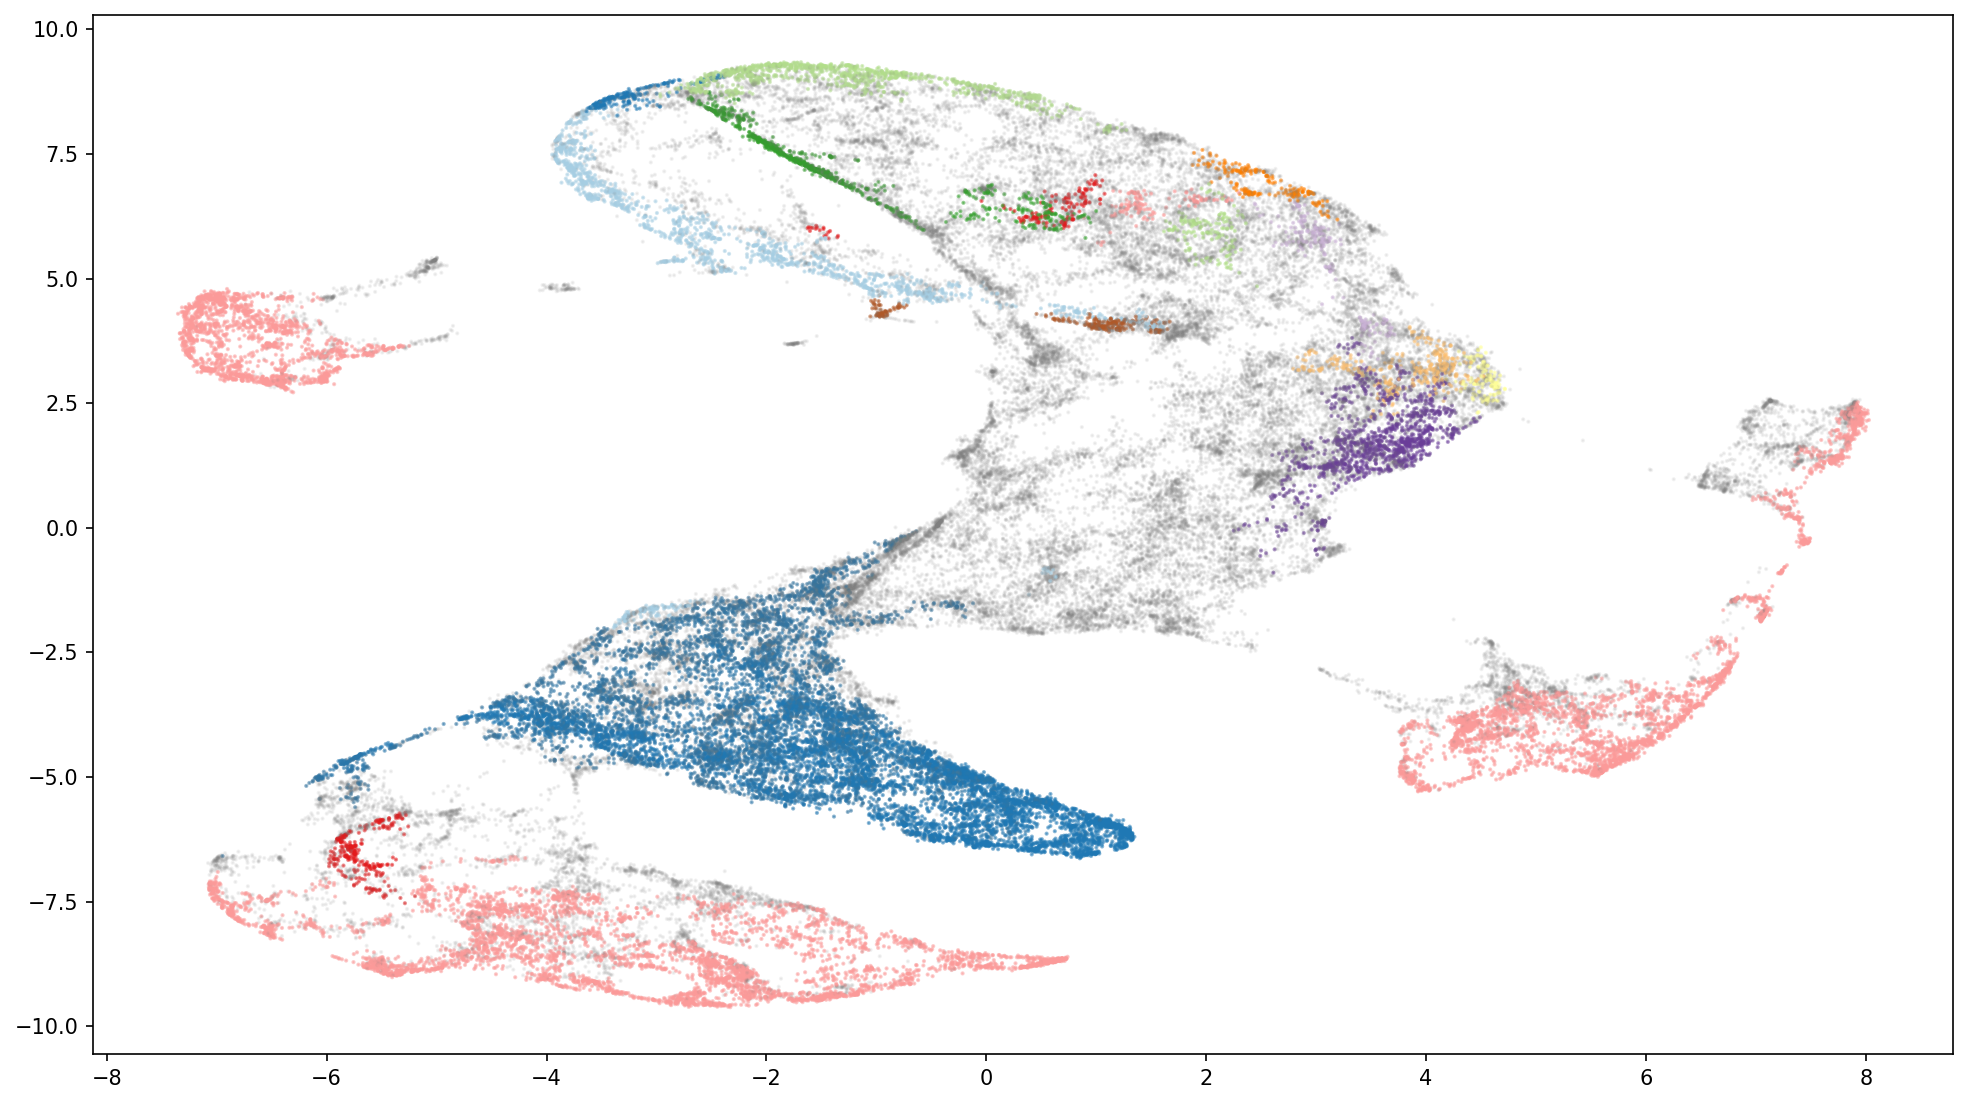

In [ ]:
best_index = (np.array(relative_validity_list) == np.max(np.array(relative_validity_list))).nonzero()[0][0]
best_validity = np.max(np.array(relative_validity_list))

clusterer = hdbscan.HDBSCAN(**parameter_list[best_index])
clusterer.fit(normalized_embeddings)

# Plotting best results
sns.color_palette('Paired', clusterer.labels_.max()+1)

color_palette = sns.color_palette('Paired', clusterer.labels_.max()+1)
cluster_colors = [color_palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in zip(cluster_colors, clusterer.probabilities_)]
cluster_alphas = np.ones_like(clusterer.labels_)*0.5
cluster_alphas[clusterer.labels_==-1] = 0.1

fig = draw_umap(data=normalized_embeddings, colors=cluster_member_colors, n_neighbors=n_neighbors, min_dist=min_dist, repulsion_strength=repulsion_strength, n_components=n_components, spread=spread, metric=metric, title='', alpha=cluster_alphas)

wandb.log({"UMAP 2d Optimal validity": wandb.Image(fig)})

log_df = pd.DataFrame(parameter_list[best_index],index=[0])
best_parameters_table = wandb.Table(dataframe=log_df)
wandb.log({"Best validity parameters": best_parameters_table})

parameter_list[best_index]

[D] [16:31:33.046331] /__w/cuml/cuml/cpp/src/umap/runner.cuh:108 n_neighbors=100
[D] [16:31:33.047924] /__w/cuml/cuml/cpp/src/umap/runner.cuh:130 Calling knn graph run
[D] [16:31:33.206502] /__w/cuml/cuml/cpp/src/umap/runner.cuh:136 Done. Calling fuzzy simplicial set
[D] [16:31:33.211324] /__w/cuml/cuml/cpp/src/umap/fuzzy_simpl_set/naive.cuh:317 Smooth kNN Distances
[D] [16:31:33.212396] /__w/cuml/cuml/cpp/src/umap/fuzzy_simpl_set/naive.cuh:319 sigmas = [ 0.00894645, 0.0082074, 0.010278, 0.0088378, 0.00601842, 0.00507383, 0.00410467, 0.00532702, 0.0100802, 0.00505741, 0.00312745, 0.00783224, 0.00952211, 0.0285785, 0.01684, 0.0220786, 0.00695731, 0.0173058, 0.0198895, 0.0301667, 0.0164861, 0.0332813, 0.0163673, 0.00920859, 0.0128202 ]

[D] [16:31:33.213120] /__w/cuml/cuml/cpp/src/umap/fuzzy_simpl_set/naive.cuh:321 rhos = [ 0.018657, 0.0149413, 0.0109163, 0.00754512, 0.0174815, 0.0146384, 0.00369652, 0.00543959, 0.016453, 0.00571698, 0.00373142, 0.0167158, 0.0191574, 0.0340666, 0.0411413

{'cluster_selection_epsilon': 0.0,
 'cluster_selection_method': 'leaf',
 'gen_min_span_tree': True,
 'metric': 'euclidean',
 'min_cluster_size': 2,
 'min_samples': 2}

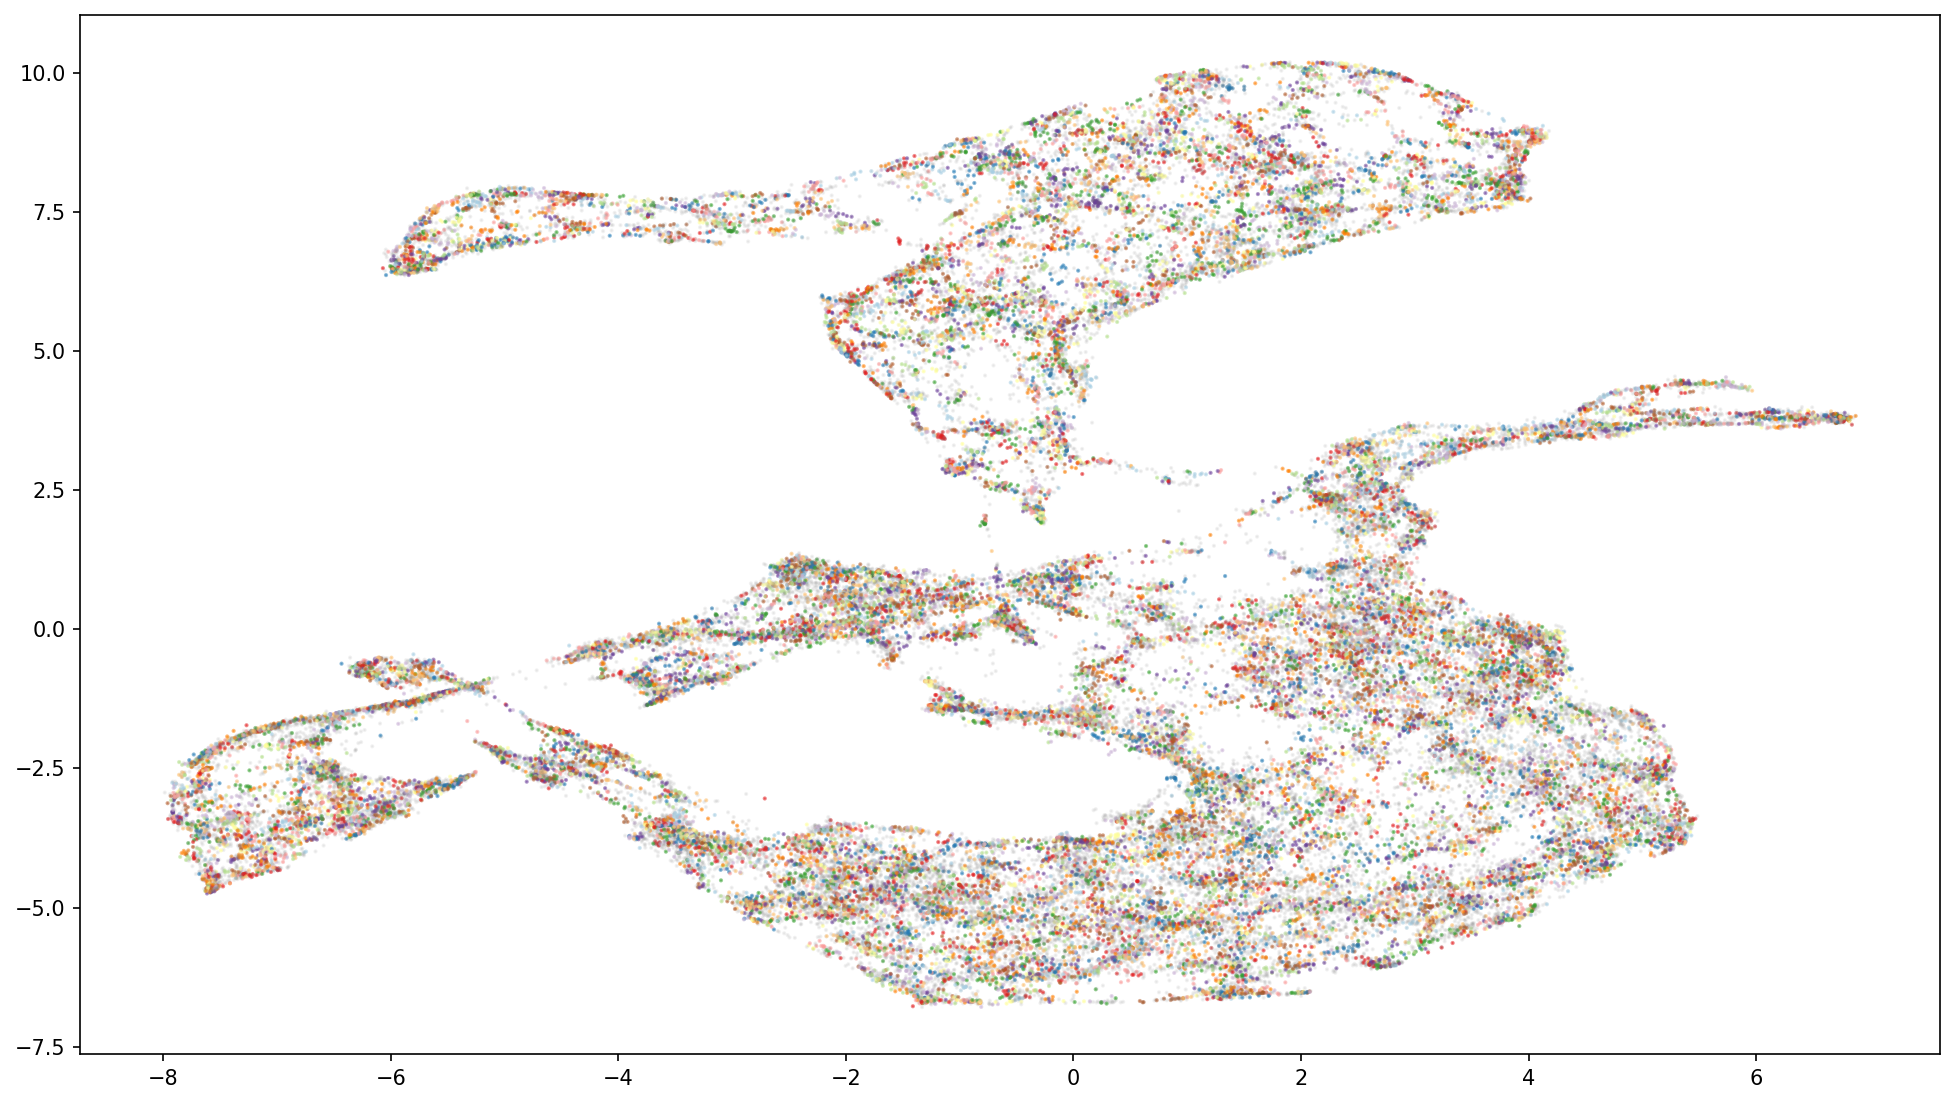

In [ ]:
best_index = (np.array(DBIndex_list) == np.min(np.array(DBIndex_list))).nonzero()[0][0]
best_dbindex = np.min(np.array(DBIndex_list))

clusterer = hdbscan.HDBSCAN(**parameter_list[best_index])
clusterer.fit(normalized_embeddings)

# Plotting best results
sns.color_palette('Paired', clusterer.labels_.max()+1)

color_palette = sns.color_palette('Paired', clusterer.labels_.max()+1)
cluster_colors = [color_palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in zip(cluster_colors, clusterer.probabilities_)]
cluster_alphas = np.ones_like(clusterer.labels_)*0.5
cluster_alphas[clusterer.labels_==-1] = 0.1

fig = draw_umap(data=normalized_embeddings, colors=cluster_member_colors, n_neighbors=n_neighbors, min_dist=min_dist, repulsion_strength=repulsion_strength, n_components=n_components, spread=spread, metric=metric, title='', alpha=cluster_alphas)

wandb.log({"UMAP 2d Optimal DBIndex": wandb.Image(fig)})

log_df = pd.DataFrame(parameter_list[best_index],index=[0])
best_parameters_table = wandb.Table(dataframe=log_df)
wandb.log({"Best DBIndex parameters": best_parameters_table})

parameter_list[best_index]

[D] [16:31:50.449057] /__w/cuml/cuml/cpp/src/umap/runner.cuh:108 n_neighbors=100
[D] [16:31:50.450728] /__w/cuml/cuml/cpp/src/umap/runner.cuh:130 Calling knn graph run
[D] [16:31:50.620340] /__w/cuml/cuml/cpp/src/umap/runner.cuh:136 Done. Calling fuzzy simplicial set
[D] [16:31:50.629535] /__w/cuml/cuml/cpp/src/umap/fuzzy_simpl_set/naive.cuh:317 Smooth kNN Distances
[D] [16:31:50.630170] /__w/cuml/cuml/cpp/src/umap/fuzzy_simpl_set/naive.cuh:319 sigmas = [ 0.00894645, 0.0082074, 0.010278, 0.0088378, 0.00601842, 0.00507383, 0.00410467, 0.00532702, 0.0100802, 0.00505741, 0.00312745, 0.00783224, 0.00952211, 0.0285785, 0.01684, 0.0220786, 0.00695731, 0.0173058, 0.0198895, 0.0301667, 0.0164861, 0.0332813, 0.0163673, 0.00920859, 0.0128202 ]

[D] [16:31:50.630733] /__w/cuml/cuml/cpp/src/umap/fuzzy_simpl_set/naive.cuh:321 rhos = [ 0.018657, 0.0149413, 0.0109163, 0.00754512, 0.0174815, 0.0146384, 0.00369652, 0.00543959, 0.016453, 0.00571698, 0.00373142, 0.0167158, 0.0191574, 0.0340666, 0.0411413

{'cluster_selection_epsilon': 0.15,
 'cluster_selection_method': 'leaf',
 'gen_min_span_tree': True,
 'metric': 'euclidean',
 'min_cluster_size': 256,
 'min_samples': 2}

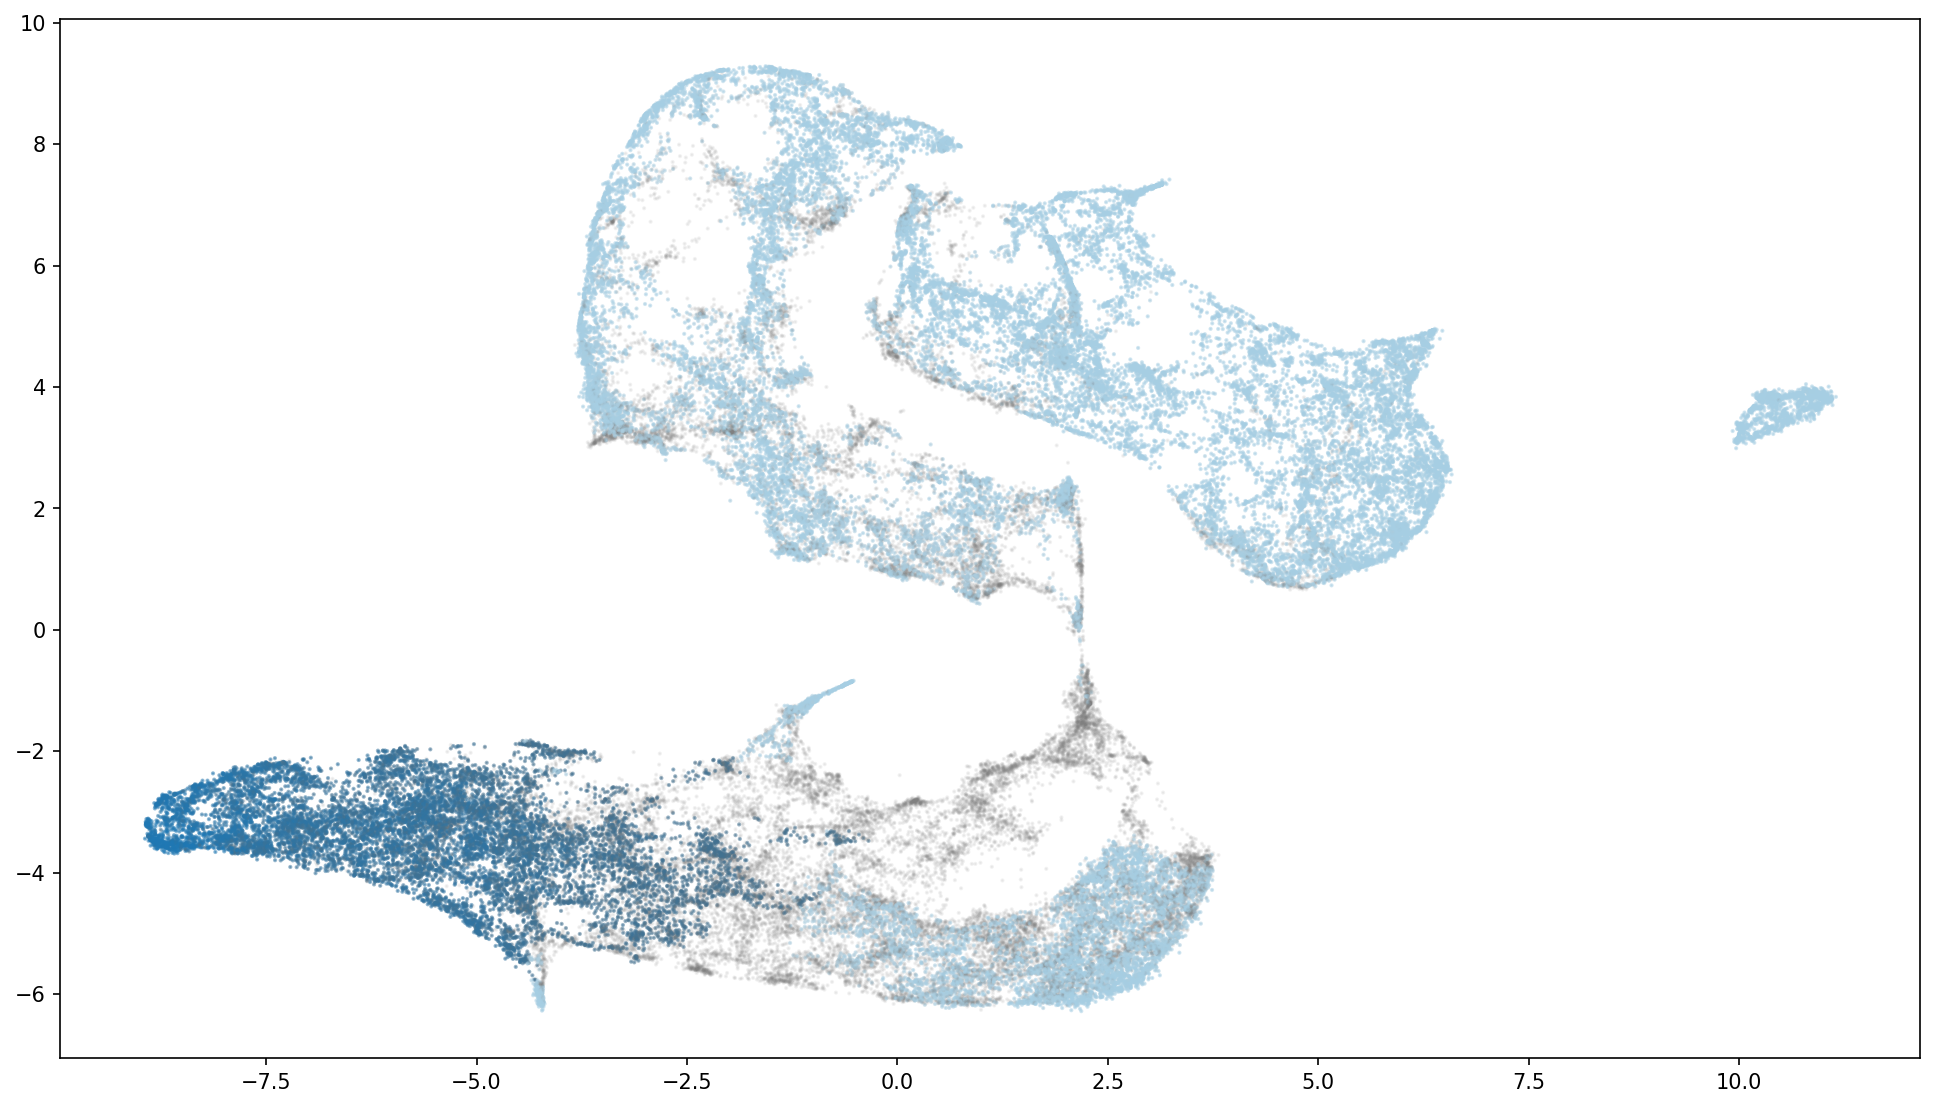

In [ ]:
best_index = (np.array(silhouette_list) == np.max(np.array(silhouette_list))).nonzero()[0][0]
best_silhouette = np.max(np.array(silhouette_list))

clusterer = hdbscan.HDBSCAN(**parameter_list[best_index])
clusterer.fit(normalized_embeddings)

# Plotting best results
sns.color_palette('Paired', clusterer.labels_.max()+1)

color_palette = sns.color_palette('Paired', clusterer.labels_.max()+1)
cluster_colors = [color_palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in zip(cluster_colors, clusterer.probabilities_)]
cluster_alphas = np.ones_like(clusterer.labels_)*0.5
cluster_alphas[clusterer.labels_==-1] = 0.1


fig = draw_umap(data=normalized_embeddings, colors=cluster_member_colors, n_neighbors=n_neighbors, min_dist=min_dist, repulsion_strength=repulsion_strength, n_components=n_components, spread=spread, metric=metric, title='', alpha=cluster_alphas)

wandb.log({"UMAP 2d Optimal silhouette": wandb.Image(fig)})

log_df = pd.DataFrame(parameter_list[best_index],index=[0])
best_parameters_table = wandb.Table(dataframe=log_df)
wandb.log({"Best silhouette parameters": best_parameters_table})

parameter_list[best_index]

In [ ]:
wandb.log({'Best Validity:': best_validity,
           'Best Silhouette': best_silhouette,
           'Best DBIndex': best_dbindex})

print('Silhouette Score (best is 1):', best_silhouette)
print('Davies-Bouldin Score (best is 0):', best_dbindex)
print('HDBSCAN Relative Validity (higher is better):', best_validity)
wandb.finish()

Silhouette Score (best is 1): 0.08010975271463394
Davies-Bouldin Score (best is 0): 1.101656916051111
HDBSCAN Relative Validity (higher is better): 0.14980183204902423


In [ ]:
embeddings_index = pd.DataFrame(embeddings_inference)
embeddings_index['FileName'] = returned_images
embeddings_index

0         1         2         3         4         5         6  \
0     -0.202942  0.206327 -0.795802  0.174059  0.534396  0.327063  1.015124   
1     -0.185866  0.446081 -1.587931  0.718707 -0.739782  1.106793  1.415307   
2      0.242190 -0.303408  0.446622  0.014401 -0.077916 -0.036478 -1.899953   
3      0.310823  0.286399 -0.627801  0.918951 -0.239283  0.103471  1.269594   
4     -0.179830 -0.019129  0.248774  0.005368  0.397281 -0.298827 -2.002696   
...         ...       ...       ...       ...       ...       ...       ...   
73211 -0.218435  0.268051 -0.684944  0.875816 -0.428785  0.188514  1.208777   
73212 -0.046118  0.330693 -0.735377  0.900897 -0.460256  0.300232  1.163614   
73213 -0.269368  0.181462 -0.558375  1.236785  0.041405  1.135362 -0.187832   
73214 -0.303048 -0.522367  0.439764 -0.626474  0.525037 -0.162369 -0.581425   
73215  0.246497  0.007026  0.926342 -0.597154  1.076724 -0.559504  1.030999   

              7         8         9  ...        55        56        57  \
0     -0.627693  0.313693  0.049123  ... -0.674732  0.538512  0.097372   
1     -0.151876  0.479145 -0.025095  ... -0.518784 -0.886013  0.244782   
2      0.740472 -0.901335 -0.312987  ... -0.508927  1.076248 -0.775025   
3     -0.791699  0.251723 -0.340451  ...  0.073376  0.284318  0.018669   
4      0.432765 -0.669487 -0.003595  ... -0.221330  0.852137 -1.102042   
...         ...       ...       ...  ...       ...       ...       ...   
73211 -0.282824  0.551156  0.511769  ... -0.270741 -0.406050  0.231384   
73212 -0.387808  0.507037  0.346309  ... -0.273072 -0.114739 -0.014427   
73213  0.580633 -0.375564  0.018162  ... -0.412178  0.394312  0.469833   
73214  0.085292  0.462853  0.361554  ... -0.727953  0.362923 -0.019644   
73215 -0.071488  0.958033  0.203722  ...  1.114725 -0.302581  0.615764   

             58        59        60        61        62        63  \
0     -1.001813  0.384438 -0.371086  0.108863  0.517121 -0.459567   
1     -0.580335  1.229304  0.190460  0.109347 -0.979384 -0.498513   
2      1.788840 -1.001098  0.036916 -0.407195  1.670907  0.135943   
3     -1.155044  0.148340 -0.239569  0.460310 -0.629558  0.087224   
4      1.320741 -0.616036  0.434701  0.027603  1.890055 -0.236840   
...         ...       ...       ...       ...       ...       ...   
73211 -0.302619 -0.047943 -0.279185 -0.004724 -1.244081 -0.198692   
73212 -0.539046 -0.111604 -0.394258  0.160579 -0.972276 -0.322417   
73213 -0.161998 -0.855776 -0.253795 -0.191583  0.390191 -0.726119   
73214 -0.248917  0.242293 -0.116236  0.719655  0.674660  0.242705   
73215 -0.759459  1.323408  0.500019 -0.681859 -0.087207 -0.132765   

                                                FileName  
0      /content/AIA211_193_171_256x256/20150530_00000...  
1      /content/AIA211_193_171_256x256/20160414_00000...  
2      /content/AIA211_193_171_256x256/20150607_00000...  
3      /content/AIA211_193_171_256x256/20140722_00000...  
4      /content/AIA211_193_171_256x256/20150810_00000...  
...                                                  ...  
73211  /content/AIA211_193_171_256x256/20201102_23595...  
73212  /content/AIA211_193_171_256x256/20210504_23595...  
73213  /content/AIA211_193_171_256x256/20190913_23595...  
73214  /content/AIA211_193_171_256x256/20120513_00000...  
73215  /content/AIA211_193_171_256x256/20130727_00000...  

[73216 rows x 65 columns]

In [ ]:
# Select random embedding
embeddings_index.iloc[:,:64].values
query_index = np.random.choice(embeddings_index.shape[0], size=1)
query_embedding = embeddings_index.iloc[query_index,:64]

print(query_embedding.shape)
print(embeddings_index.iloc[:,:64].values.shape)
print(embeddings_index.shape)

(1, 64)
(73216, 64)
(73216, 66)


In [ ]:
# Load sklearn cosine sim
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Calculate cosine sim on all embeddings compared to query_embedding
embeddings_index['cosine_similarity'] = cosine_similarity(embeddings_index.iloc[:,:64].values, query_embedding)
embeddings_index

0         1         2         3         4         5         6  \
0     -0.202942  0.206327 -0.795802  0.174059  0.534396  0.327063  1.015124   
1     -0.185866  0.446081 -1.587931  0.718707 -0.739782  1.106793  1.415307   
2      0.242190 -0.303408  0.446622  0.014401 -0.077916 -0.036478 -1.899953   
3      0.310823  0.286399 -0.627801  0.918951 -0.239283  0.103471  1.269594   
4     -0.179830 -0.019129  0.248774  0.005368  0.397281 -0.298827 -2.002696   
...         ...       ...       ...       ...       ...       ...       ...   
73211 -0.218435  0.268051 -0.684944  0.875816 -0.428785  0.188514  1.208777   
73212 -0.046118  0.330693 -0.735377  0.900897 -0.460256  0.300232  1.163614   
73213 -0.269368  0.181462 -0.558375  1.236785  0.041405  1.135362 -0.187832   
73214 -0.303048 -0.522367  0.439764 -0.626474  0.525037 -0.162369 -0.581425   
73215  0.246497  0.007026  0.926342 -0.597154  1.076724 -0.559504  1.030999   

              7         8         9  ...        56        57        58  \
0     -0.627693  0.313693  0.049123  ...  0.538512  0.097372 -1.001813   
1     -0.151876  0.479145 -0.025095  ... -0.886013  0.244782 -0.580335   
2      0.740472 -0.901335 -0.312987  ...  1.076248 -0.775025  1.788840   
3     -0.791699  0.251723 -0.340451  ...  0.284318  0.018669 -1.155044   
4      0.432765 -0.669487 -0.003595  ...  0.852137 -1.102042  1.320741   
...         ...       ...       ...  ...       ...       ...       ...   
73211 -0.282824  0.551156  0.511769  ... -0.406050  0.231384 -0.302619   
73212 -0.387808  0.507037  0.346309  ... -0.114739 -0.014427 -0.539046   
73213  0.580633 -0.375564  0.018162  ...  0.394312  0.469833 -0.161998   
73214  0.085292  0.462853  0.361554  ...  0.362923 -0.019644 -0.248917   
73215 -0.071488  0.958033  0.203722  ... -0.302581  0.615764 -0.759459   

             59        60        61        62        63  \
0      0.384438 -0.371086  0.108863  0.517121 -0.459567   
1      1.229304  0.190460  0.109347 -0.979384 -0.498513   
2     -1.001098  0.036916 -0.407195  1.670907  0.135943   
3      0.148340 -0.239569  0.460310 -0.629558  0.087224   
4     -0.616036  0.434701  0.027603  1.890055 -0.236840   
...         ...       ...       ...       ...       ...   
73211 -0.047943 -0.279185 -0.004724 -1.244081 -0.198692   
73212 -0.111604 -0.394258  0.160579 -0.972276 -0.322417   
73213 -0.855776 -0.253795 -0.191583  0.390191 -0.726119   
73214  0.242293 -0.116236  0.719655  0.674660  0.242705   
73215  1.323408  0.500019 -0.681859 -0.087207 -0.132765   

                                                FileName  cosine_similarity  
0      /content/AIA211_193_171_256x256/20150530_00000...           0.379721  
1      /content/AIA211_193_171_256x256/20160414_00000...           0.308101  
2      /content/AIA211_193_171_256x256/20150607_00000...          -0.459807  
3      /content/AIA211_193_171_256x256/20140722_00000...           0.420230  
4      /content/AIA211_193_171_256x256/20150810_00000...          -0.620536  
...                                                  ...                ...  
73211  /content/AIA211_193_171_256x256/20201102_23595...           0.154894  
73212  /content/AIA211_193_171_256x256/20210504_23595...           0.231175  
73213  /content/AIA211_193_171_256x256/20190913_23595...          -0.323043  
73214  /content/AIA211_193_171_256x256/20120513_00000...           0.107447  
73215  /content/AIA211_193_171_256x256/20130727_00000...           0.574942  

[73216 rows x 66 columns]

In [ ]:
# Get k nearest neighbors based on cosine_similarity
query_neighbors = embeddings_index.sort_values(by=['cosine_similarity'], ascending=False)
k = 20
kquery_neighbors = query_neighbors.iloc[:k,:65]
kquery_neighbors

0         1         2         3         4         5         6  \
860    0.363288 -0.399583  0.128739  0.441080  0.125761  0.325090  0.869259   
30010  0.382763 -0.443317  0.188879  0.316890  0.026360  0.258191  0.964107   
46274  0.356847 -0.320131  0.241146  0.357062  0.185620  0.350877  0.762027   
55434  0.385681 -0.385106 -0.064804  0.537898  0.174884  0.436570  0.709693   
35474  0.369416 -0.418429  0.354971  0.298294 -0.005465  0.225305  0.898228   
62166  0.544032 -0.401436  0.079400  0.605743  0.061054  0.356086  0.878688   
63117  0.301236 -0.343883  0.293931  0.288548  0.066408  0.289671  0.613517   
22696  0.351502 -0.199063  0.001133  0.536175  0.073919  0.364974  1.002381   
42738  0.250942 -0.319244 -0.059452  0.304270  0.275383  0.373673  0.572448   
70001  0.366858 -0.486255 -0.209905  0.432251  0.203274  0.262212  0.823105   
9244   0.474578 -0.431810 -0.036509  0.564805  0.040770  0.392844  0.635769   
50395  0.425139 -0.297160  0.414417  0.397283  0.024517  0.342025  1.076462   
49715  0.481725 -0.265403  0.385907  0.521522 -0.053810  0.376833  0.769329   
44594  0.344035 -0.299280  0.369800  0.252354  0.058438  0.292242  0.655844   
27970  0.306448 -0.347088 -0.004078  0.502556  0.146996  0.388199  0.906093   
36518  0.410982 -0.305973  0.240331  0.403093  0.020998  0.367861  1.073623   
54572  0.210455 -0.332348  0.247552  0.071409  0.085728  0.164418  0.816762   
59560  0.291558 -0.377812  0.106151  0.325274  0.133859  0.266916  0.577484   
51613  0.419178 -0.209015  0.479978  0.376382  0.182687  0.387209  0.842717   
9891   0.428932 -0.333116  0.204685  0.560461 -0.020268  0.360661  1.076028   

              7         8         9  ...        55        56        57  \
860    0.305407  0.248738 -0.370814  ...  0.043775  0.175470  0.674138   
30010  0.254525  0.291188 -0.442710  ...  0.160753  0.135204  0.559012   
46274  0.417168  0.132657 -0.406988  ...  0.143078  0.198834  0.694784   
55434  0.503025  0.140990 -0.450967  ... -0.144464  0.229919  0.583685   
35474  0.322089  0.245415 -0.411088  ...  0.315117  0.225812  0.601838   
62166  0.295302  0.298078 -0.192318  ...  0.094643  0.095621  0.628421   
63117  0.458943  0.137440 -0.371098  ...  0.192619  0.202952  0.668605   
22696  0.070849  0.350565 -0.282956  ...  0.074028  0.008157  0.669360   
42738  0.477744  0.093797 -0.515983  ... -0.059554  0.252867  0.665146   
70001  0.288491  0.393907 -0.371048  ... -0.177678  0.230405  0.630438   
9244   0.435879  0.147404 -0.249505  ...  0.074515  0.229571  0.626971   
50395  0.195786  0.259521 -0.349375  ...  0.342938  0.027891  0.603275   
49715  0.429740  0.051459 -0.213664  ...  0.297575  0.076247  0.612737   
44594  0.406944  0.112788 -0.297973  ...  0.264457  0.148374  0.700725   
27970  0.318932  0.205844 -0.293427  ...  0.059640  0.030949  0.640924   
36518  0.081193  0.325489 -0.274001  ...  0.307745 -0.085158  0.611006   
54572  0.200201  0.266025 -0.529293  ...  0.188050  0.172663  0.669876   
59560  0.370522  0.271128 -0.221830  ...  0.080239  0.222445  0.769219   
51613  0.454308  0.120654 -0.275461  ...  0.328833  0.121668  0.683531   
9891   0.174269  0.286287 -0.244034  ...  0.209154 -0.011216  0.606172   

             58        59        60        61        62        63  \
860   -0.849919  0.794455  0.497591 -0.298802 -0.518454  0.619742   
30010 -0.908332  0.773788  0.424382 -0.301222 -0.644944  0.551301   
46274 -0.834167  0.841873  0.520641 -0.309838 -0.517147  0.612496   
55434 -0.769523  0.594587  0.457601 -0.236826 -0.534341  0.630202   
35474 -0.967048  0.870928  0.542343 -0.346369 -0.655030  0.496809   
62166 -0.694889  0.940757  0.431617 -0.276475 -0.693505  0.519170   
63117 -0.850802  0.789169  0.642645 -0.329918 -0.558485  0.533376   
22696 -0.772004  0.736882  0.149541 -0.186496 -0.594809  0.554745   
42738 -0.828302  0.731988  0.622660 -0.215378 -0.373562  0.729493   
70001 -0.736491  0.672564  0.511925 -0.228932 -0.590629  0.667318   
9244  -0.655263  0.801685  0.605483 -0.2

In [ ]:
print(kquery_neighbors.iloc[0, 32])

0.5412985


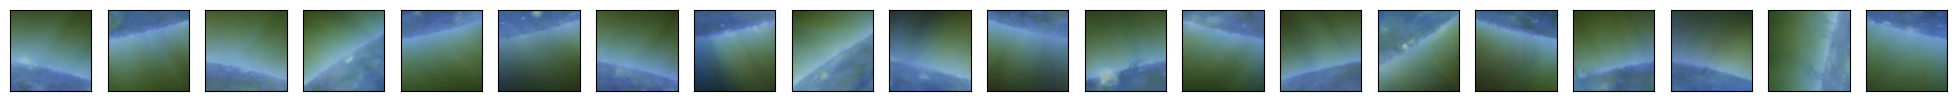

In [ ]:
fig, ax = plt.subplots(1, k, figsize=(25, 25))
for i in range(k):
  img = read_image(image_loc=kquery_neighbors.iloc[i,64], image_format='jpg')
  ax[i].imshow(img)
  ax[i].set_xticks([])
  ax[i].set_yticks([])

plt.show()